In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp
import scipy.signal as sig
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

%matplotlib ipympl

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# Matched filters and correlation

* **AIS2201 - Signal Processing**
* **Uke 42, 2024**
* **Related reading materials:**
    * Chapter 7.3 in Understanding Digital Signal Processing
    * Supplementary literature:
        * Introductory text on correlation from [The Scientist and Engineer's Guide to Digital Signal Processing](http://www.dspguide.com/ch7/3.htm)
        * A [Jupyter Notebook learning resource](https://github.com/spatialaudio/digital-signal-processing-lecture/blob/f4829a118144c66d1bf61d6dbc630cdb5019ee36//random_signals/correlation_functions.ipynb) with a more rigorous mathematical overview and python examples
* **Lecturerer: Kai Erik Hoff**

# Topics

* The matched filter
    * How to detect a particular signal buried in noise
* The cross-correlation function
* Computing the cross-correlation between two signals
* The auto-correlation function
    * Autocorrelation of some typical signals
* Computing the autocorrelation of a signal

# Matched filters

# Signal detection with matched filters

* **Purpose:** highlight the presence of a specific waveform $s[n]$ within a measured signal $x[n]$
$$ x[n] = \gamma \cdot s[n - K] + v[n]$$
where $v[n]$ is any kind of interference 

* **Some Applications:**
    * Radar
    * Sonar
    * Communication systems
    * GPS Recievers

# The matched filter

* Assuming $s[n]$ is finite-length with a length of $M$ samples, the impululse response for the matched filter is:
$$h[n] = s[M-1-n]$$
    * Time-reversal of desired signal, with $M-1$ samples added delay (to ensure causality)

Text(0.5, 1.0, 'h[n]')

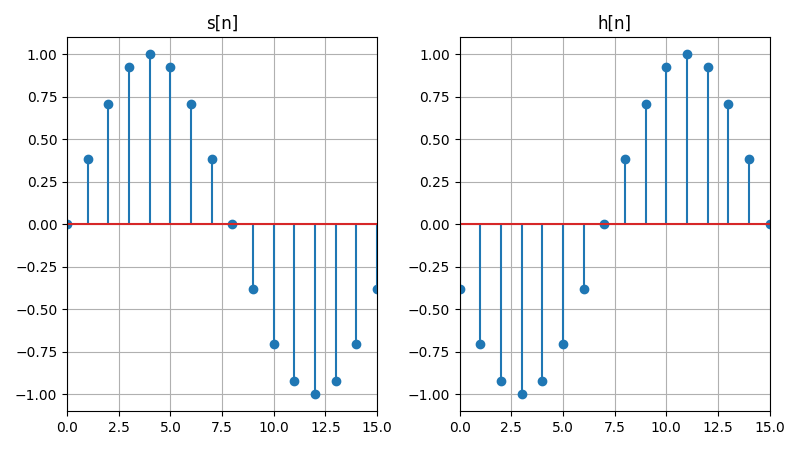

In [2]:
# Example signal s[n] = sin(pi/8*n), 0 <= n < 16
M = 16
n = np.arange(M)
s_n = np.sin(np.pi/8*n)

# Matched filter
h_n = s_n[M-1::-1]  # Reverse slice

# Figure
plt.close(1); plt.figure(1)
plt.subplot(1,2,1)
plt.stem(n, s_n)
plt.title("s[n]")
plt.subplot(1,2,2)
plt.stem(n, h_n)
plt.title("h[n]")

# Convolution with matched filter
* Run the demo below to test the use of matched filters on a signal with noise

Output()

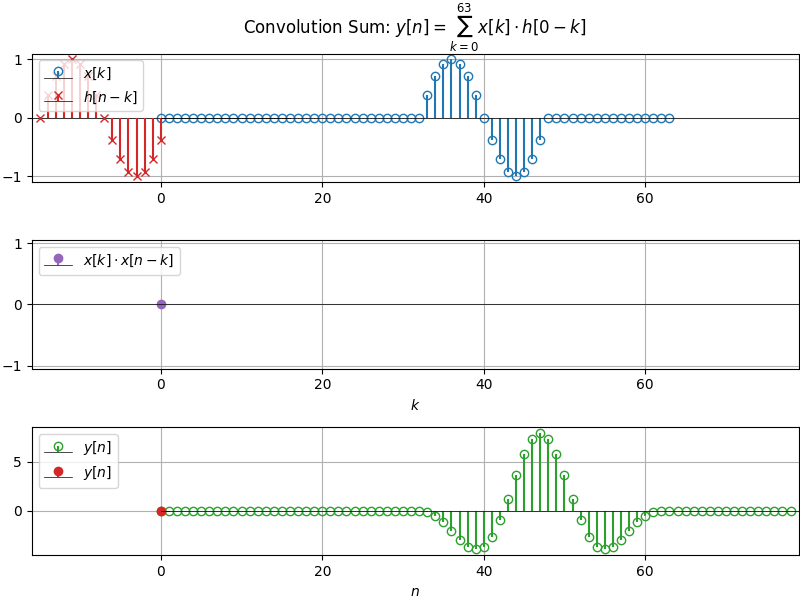

In [3]:
from demos import ConvolutionDemo

L , K = 64, 32  # Length of x[n], and signal delay K
x_n = 0*np.random.normal(size=L)  # Add some level of noise
x_n[K:K+M] += s_n  # Add desired signal with K samples of shift
ConvolutionDemo(x_n, h_n, fig_num=2);

# Matched filters explained

* The matched filter *maximises* signal-to-noise ratio in the filtered signal $y[n]$
$$\begin{align}
y[n] &= x[n] * h[n] \\
 &= s[n]*h[n] + v[n]*h[n] \ \ \ \ \text{(distributive property)}
\end{align}$$
    * $s[n]$ "matches" $h[n]$, and is amplified more than any other possible waveform
    * $v[n]$ does not "match" $h[n]$, and is therefore suppressed

* The matched filter is a specialized filter which calculates what is called the *cross-correlation* between the desired signal $s[n]$ and the measured signal $x[n]$.

# Cross-correlation

* Statistical measure of dependencies between signals (e.g. $x[n]$ and $y[n]$)
    * Alternative formulation:<br>*"What is the connection between $y[n]$ and $x[n]$?"*

* The cross-correlation function defined:
$$\begin{align}r_{xy}[l] &= E(x[n]\cdot y[n-l]) \\
&= E(x[n+l]\cdot y[n])\end{align}$$

* For random signals, the cross-correlation function $r_{xy}[l]$ can be calculated based on statistical properties.
    * Statistical signal processing theory uses correlation **A LOT!**
    * For zero mean signals ($E(x[n])=0$), $\text{cross-correlation} = \text{cross-covariance}$

# Estimating cross-correlation

* Given two sampled signals $x[n]$ and $y[n]$ of equal length $N$, an estimate $\hat{r}_{xy}[l]$ can be calculated:
$$\hat{r}_{xy}[l] = \frac{1}{N} \sum_{n=-N+1}^{N-1} x[n] \cdot y[n-l] $$
    * Also referred to as a *biased* cross-correlation estimate.

* Equivalent to convolution (with one signal time-reversed):
$$
\begin{align}
\hat{r}_{xy}[l] &\propto \sum_{n} x[n]\cdot y[n-l] \\ 
&= \sum_{n} x[n] \cdot y[-(l-n)] \\ 
&= x[l] * y[-l]
\end{align}
$$


* Commonly, the scaling term is $\frac{1}{N}$ omitted. This is sometimes called "raw" correlation
    * For instance, the function [`correlate`](https://numpy.org/doc/stable/reference/generated/numpy.correlate.html) calculates $x[l]*y[-l]$, which is a *raw* correlation estimate.

# Cross-correlation demo

Output()

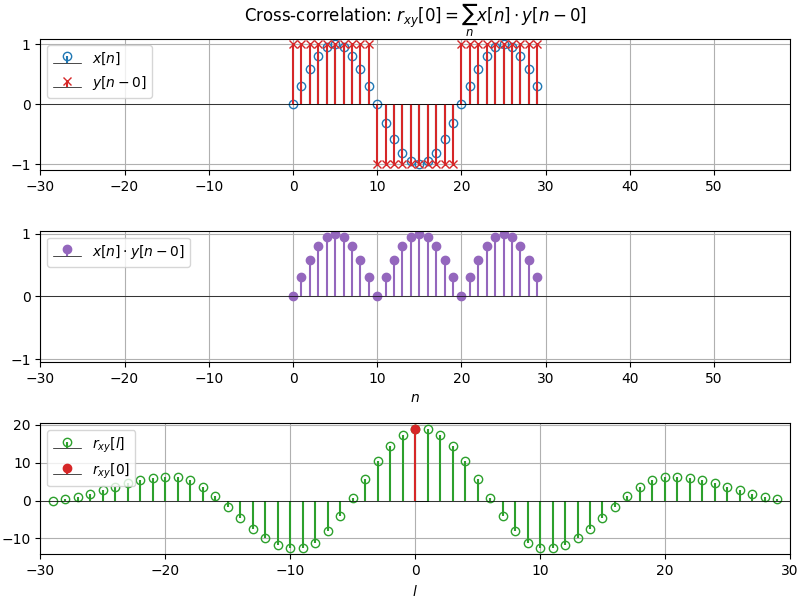

In [4]:
import numpy as np
from demos import CrossCorrelationDemo
%matplotlib ipympl
n = np.arange(30); 
xn = np.sin(np.pi/10*n) # Sinusoid
yn = sig.square(np.pi/10*n) # Square wave
CrossCorrelationDemo(xn, yn, fig_num=3);

## Cross-correlation in Python

* There are 3 different "modes"

<StemContainer object of 3 artists>

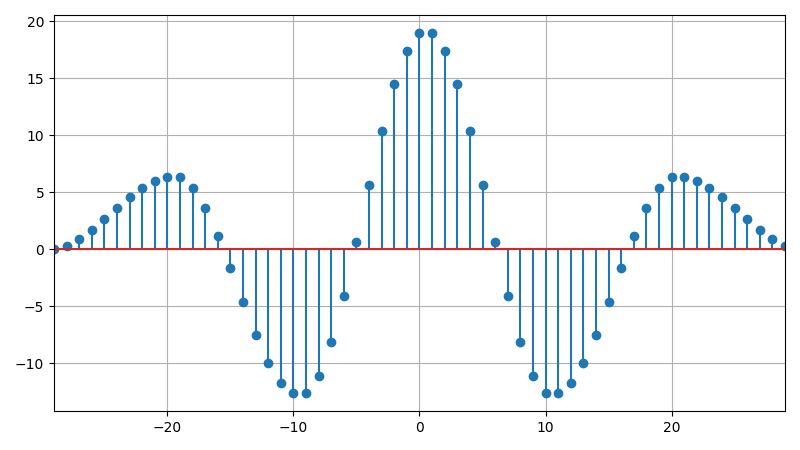

In [5]:
n = np.arange(30); 
xn = np.sin(np.pi/10*n) # Sinusoid
yn = sig.square(np.pi/10*n) # Square wave

#r_xy = np.correlate(xn, yn, mode='valid')  # Only values of 'l' where there is "full" overlap
#r_xy = np.correlate(xn, yn, mode='same')  # Truncated corralation sequence with same number of output samples as input samples
r_xy = np.correlate(xn, yn, mode='full')  # All values of 'l' where there is 1 or more samples overlap

l = np.arange(len(r_xy))-len(r_xy)//2

plt.close(4); plt.figure(4)
plt.stem(l, r_xy)

## Cross-correlation applied: *sound source localization*

<img src="figures/sound_loc.png" align="right" style="margin-left:15%" width="45%"/>

* Audio source: $s(t)$
* Microphone 1: $x_1[n] = s(n\cdot T_s)$
* Microphone 2: $x_2[n] = s(n\cdot T_s -d)$

* Cross-correlation $r_{x_1 x_2}[l]$ will peak at $l\approx-\frac{d}{T_s}$
    * $\hat{d} = -\text{argmax}(r_{x_1 x_2}[l])\cdot T_s$

(0.0007288629737609329, np.float64(0.0007256235827664399))

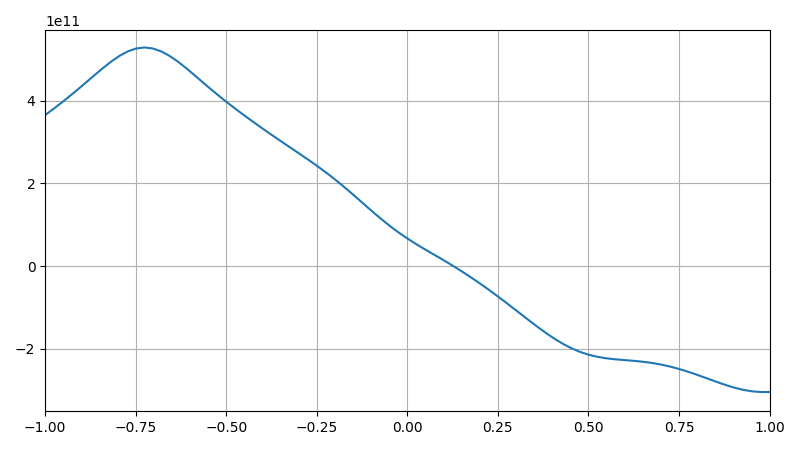

In [6]:
fs, s_n = wavfile.read("../data/piano.wav")
Ts = 1/fs
d_true = 0.25/343 # 25 cm divided by sound propagation speed
x_1 = s_n.copy()*1.0
x_2 = np.concatenate((np.zeros(round(d_true/Ts)), s_n))*1.0  # Simulate delay by adding zeroes in front

r_12 = np.correlate(x_1, x_2, mode="full")
d_est = -(np.argmax(r_12)-len(x_2)+1)*Ts  # l=0 is located in the middle of the array 'r_12'
t = (np.arange(len(r_12))-len(x_2)+1)/fs*1_000 # milliseconds

plt.close(5); plt.figure(5)
plt.plot(t, r_12)
plt.xlim([-1, 1])
d_true, d_est

# Cross-correlation properties


* Cross-correlation sequences will follow expected patterns, even if the signals are random


1. When exchanging the two random signals, the CCF exhibits the following symmetry 

    $$ r_{xy}[l] = r_{yx}[-l] $$
    

2. For typical random processes, the CCF approaches the limiting value
    $$ \lim_{|l| \to \infty} r_{xy}[l] = \mu_x \cdot \mu_y$$
   where $\mu_x$ and $\mu_y$ are the mean values of signals $x[n]$ and $y[n]$ respectively




3. Two random signals are said to be [**uncorrelated**](https://en.wikipedia.org/wiki/Uncorrelated_random_variables) if 
\begin{equation}
r_{xy}[l] = \mu_x \cdot \mu_y
\end{equation}
, and as correlated if this condition is not met.

# Auto-correlation

* Describes temporal dependencies within one signal $x[n]$

* The auto-correlation function defined:
$$\begin{align}r_{xx}[l] &= E(x[n]\cdot x[n-l]) \\
&= E(x[n+l]\cdot x[n])\end{align}$$

* For random signals, the "true" auto-correlation function $r_{xx}[l]$ can be calculated based on statistical properties.
    * For zero mean signals ($E(x[n])=0$), $\text{cross-correlation} = \text{auto-covariance}$

#  Estimating auto-correlation

* The same formula as for cross-correlation can be used.
    * Both "inputs" are now the same signal

$$\hat{r}_{xx}[l] = \frac{1}{N} \sum_{n=-N+1}^{N-1} x[n] \cdot x[n-l] $$

##  Auto-correlation demo
* Uses cross-correlation illustration

Output()

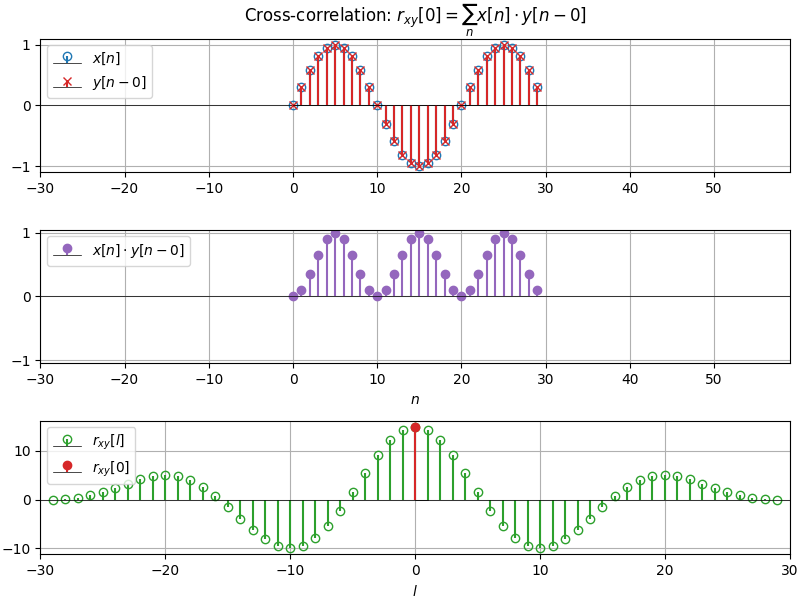

In [7]:
import numpy as np
from demos import CrossCorrelationDemo
%matplotlib ipympl
n = np.arange(30); 
xn = np.sin(np.pi/10*n) # Sinusoid
CrossCorrelationDemo(xn, xn, fig_num=6);

## Auto-correlation in Python

* Use correlate, same as with cross-correlation

<StemContainer object of 3 artists>

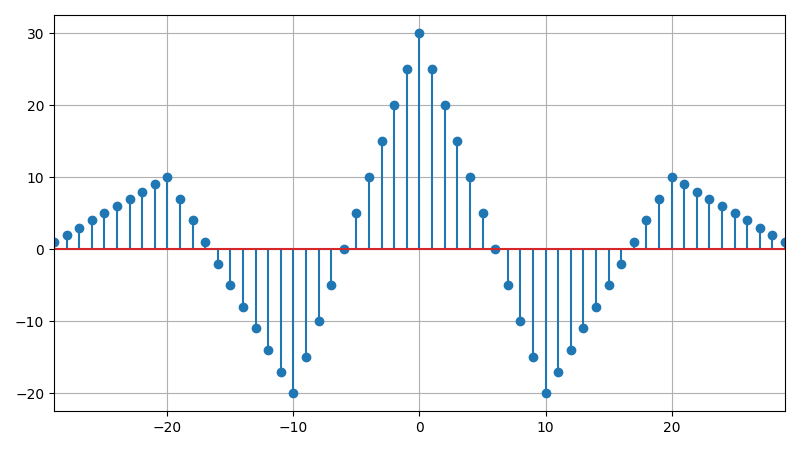

In [8]:
n = np.arange(30); 
xn = sig.square(np.pi/10*n)# Square wave

#r_xy = np.correlate(xn, yn, mode='valid')  # Only values of 'l' where there is "full" overlap
#r_xy = np.correlate(xn, yn, mode='same')  # Truncated corralation sequence with same number of output samples as input samples
r_xy = np.correlate(xn, xn, mode='full')  # All values of 'l' where there is 1 or more samples overlap

l = np.arange(len(r_xy))-len(r_xy)//2

plt.close(7); plt.figure(7)
plt.stem(l, r_xy)

# Auto-correlation properties

The following properties of the ACF can be deduced from its definition:

1. The ACF $r_{xx}[l]$ has a maximum at $l = 0$. It is given as
    
    $$ r_{xx}[0] = E\{x^2[k]\} = \sigma_x^2 + \mu_x^2 $$
    
    for random signals. This is due to the fact that the signal is equal to itself for $l = 0$. Please note that for periodic signals more than one maximum will be present.
    
2. The ACF is a function with even symmetry
    
    $$ r_{xx}[l] = r_{xx}[-l] $$
    
3. The ACF of a periodic signal $x[k] = x[k + P]$ is also periodic

    $$ r_{xx}[l] = r_{xx}[l + P] $$
    
    with the period $P \in \mathbb{N} \setminus 0$

4. A random signal $x[n]$ is said to be **uncorrelated** if
\begin{equation}
r_{xx}[l] = \mu_x^2 + \sigma_x^2 \cdot \delta[l],
\end{equation}
and as correlated if this condition is not met. In this case, $x[n]$ would be white noise.

## Auto-correlation applied: *measuring fundamental period*

* The cross-correlation function $r_{xx}[l]$ of a periodic signal $x[n]$  is periodic.
* Peaks at $l = k \cdot T_0, k \in \mathbb{Z}$
    * Peak spacing much more likely to be fundamental period
* Uncorrelated noise does not affect the autocorrelation function (except in $l=0$)

(-0.01, 0.01)

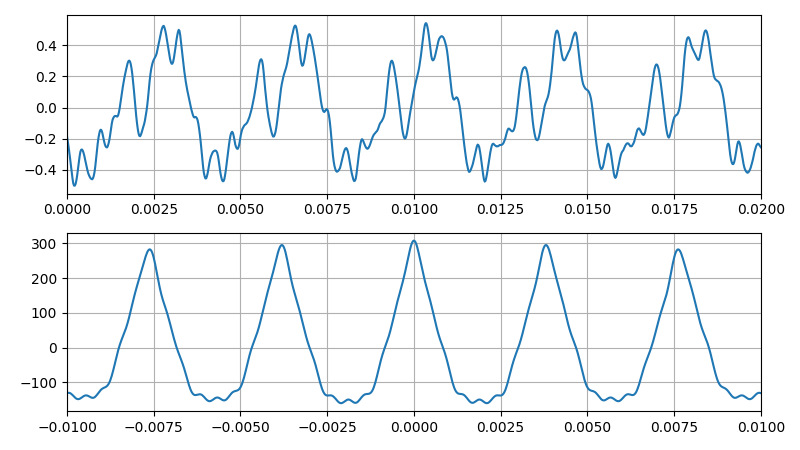

In [9]:
fs, s_n = wavfile.read("../data/piano.wav")
s_n = s_n[5_000:10_000]/max(abs(s_n)) # Extract slice and normalize
#s_n += 0.5*np.random.normal(size=len(s_n))  # Add noise 
r_ss = np.correlate(s_n, s_n, mode="full")
l = np.arange(-len(s_n)+1, len(s_n))

plt.close(8); plt.figure(8)
plt.subplot(2,1,1)
plt.plot(np.arange(len(s_n))/fs, s_n)
plt.xlim(xmax=0.02)
plt.subplot(2,1,2)
plt.plot(l/fs, r_ss)
plt.xlim([-0.01, 0.01])

## Applied correlation: *system identification using white nosie!*

* Problem:
$$ x[n] * h[n] = y[n]$$
    * $y[n]$ and $x[n]$ are known
    * $h[n]$ is unknown

* Cross-correlation $r_{xy}[l]$:
\begin{align*}
r_{xy}[l] &= E(x[n]\cdot y[n-l]) \\
          &\propto x[l] * y[-l] \\
          &= x[l]*(x[-l] * h[-l]) \\
          &= r_{xx}[l] * h[-l]
\end{align*}

* If $x[n]$ is white uncorrelated noise, $r_{xx}[l] = \sigma_x^2 \cdot \delta[n]$:
\begin{align*}
r_{yx}[l] &= \sigma_x^2 \cdot \delta[l] * h[l] \\
          &= \sigma_x^2 \cdot h[l] \\ \\
  h[l] &= \frac{r_{yx}[l]}{\sigma_x^2}
\end{align*}

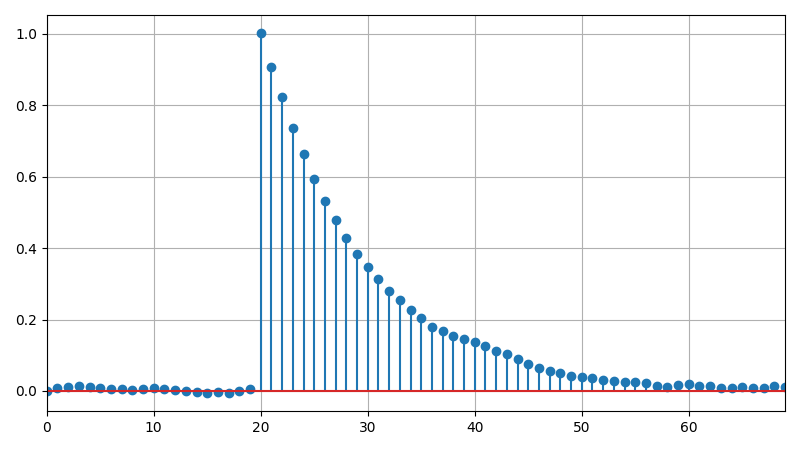

In [10]:
hn = np.concatenate((np.zeros(20), 0.9**np.arange(50))) # Unknown system impulse response

# Identification process
xn = np.random.normal(size=100_000) # White noise "test signal"
yn = np.convolve(xn, hn) # Gather output signal
h_est = np.correlate(yn, xn)/len(xn) # Calculate cross-correlation

plt.close(9); plt.figure(9)
plt.stem(h_est)
plt.show()

# Any questions?